In [1]:
# Load needed packages
import numpy as np
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import bokeh.palettes as palette # For palette of colors
import math
from scipy import stats
from matplotlib import rc
import ROOT 

# Latex rendering for plotting
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = [r'\boldmath']

# Define color palette
col = palette.brewer['RdYlGn'][10] #(8)

# Convert HTML color code to RGB
from PIL import ImageColor
ImageColor.getcolor(col[9], "RGB")

# Define folder to save plots
dir_name = './plots_equilibrium'
if not os.path.isdir(dir_name):
    os.mkdir(dir_name)

Welcome to JupyROOT 6.22/02


<ipython-input-1-9c3fc48c5439>:16: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\boldmath']


## Load manual equilibrium data

In [2]:
# Load manual datasets
path = 'Data/equilibrium_cooling.dat'
col_name = ['Rv','Vout','Voff']
df = pd.read_csv(path, sep="\t", header=None, names=col_name,skiprows=4)


# Compute bridge resistance errors
R1 = 11.98*10**3 # K Ohm
err_R1 = 1/np.sqrt(3)*np.sqrt( (0.009*R1)**2 + 0.001**2 )

R2 = 12.00*10**3 # K Ohm
err_R2 = 1/np.sqrt(3)*np.sqrt( (0.009*R2)**2 + 0.001**2 )

print('R1:', R1,'+-',err_R1)
print('R2:', R2,'+-',err_R2)

R1: 11980.0 +- 62.24990602670283
R2: 12000.0 +- 62.3538290751525


In [3]:
# Add error to Rv
df['err_Rv'] = 0.2/np.sqrt(12) 

# Convert Rv to RT and compute relative error
df['RT'] = R2/R1 * df['Rv']
df['err_RT'] = np.sqrt( (R2/R1 * df['err_Rv'])**2 + (df['Rv']/R1 * err_R2)**2 
                       + (R2/R1**2 * df['Rv'] * err_R1)**2 )

df['rel_err_RT'] = df['err_RT']/df['RT'] 

# Add error to Vout and Voff
df['err_Vout'] = (1/np.sqrt(3))*np.sqrt( (0.0015*df['Vout'])**2 + 0.2**2 )
df['err_Voff'] = (1/np.sqrt(3))*np.sqrt( (0.0015*df['Voff'])**2 + 0.2**2 )

# Compute DeltaV and err_delta_V
df['delta_V'] = df['Vout'] - df['Voff'] 
df['err_delta_V'] = np.sqrt( df['err_Vout']**2 + df['err_Voff']**2 )

In [4]:
# Conversion curve parameters
conv_int = [33.61944053230692,0.11844094924462684]
conv_slo = [2.322727020253368,0.005259472243487998]

# Convert resistance RT to temperature 
df['Ts'] = conv_slo[0]*df['Rv'] + conv_int[0]
df['err_Ts'] = np.sqrt( conv_int[1]**2 + (df['RT']*conv_slo[1])**2 )

df.describe()

,Rv,Vout,Voff,err_Rv,RT,err_RT,rel_err_RT,err_Vout,err_Voff,delta_V,err_delta_V,Ts,err_Ts
count,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,36.933333,638.752381,620.866667,5.773503e-02,36.994992,0.278174,0.007532,0.565105,0.549961,17.885714,0.788608,119.405492,0.228726
std,8.489425,15.395929,22.765310,1.422050e-17,8.503597,0.061383,0.000063,0.013044,0.019240,16.829655,0.020833,19.718616,0.039378
min,25.000000,595.600000,549.000000,5.773503e-02,25.041736,0.192892,0.007411,0.528572,0.489269,0.000000,0.720258,91.687616,0.177129
25%,32.800000,630.000000,620.000000,5.773503e-02,32.854758,0.248262,0.007511,0.557681,0.549212,1.100000,0.787094,109.804887,0.209494
50%,33.800000,639.700000,627.000000,5.773503e-02,33.856427,0.255426,0.007544,0.565902,0.555140,14.300000,0.797478,112.127614,0.213860
75%,37.200000,650.100000,634.100000,5.773503e-02,37.262104,0.279860,0.007556,0.574722,0.561155,32.700000,0.800411,120.024886,0.228989
max,60.000000,656.300000,638.500000,5.773503e-02,60.100167,0.445415,0.007703,0.579983,0.564885,46.600000,0.805854,172.983062,0.337557


## Plot manual equilibrium data

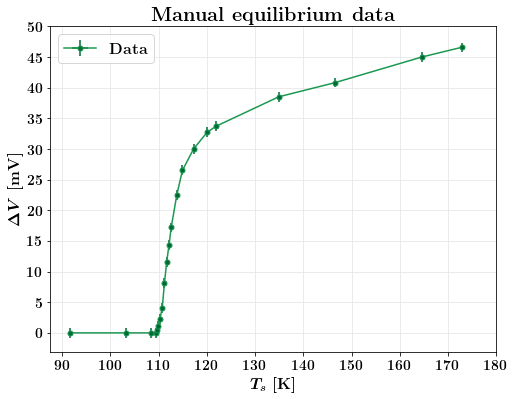

In [5]:
# Plot manual dataset

fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.errorbar(df['Ts'],df['delta_V'],yerr=df['err_delta_V'],xerr=df['err_Ts'],fmt='-o',markerfacecolor=col[0],
            color=col[1],ecolor=col[0],label=r'\bf{Data}',alpha=1,markersize=5)

ax.set_title(r'\bf{Manual equilibrium data}', fontsize=20)
ax.set_xlabel(r'\bf{$T_{s}$ [K]}',fontsize=16)
ax.set_ylabel(r'\bf{$ \Delta V$ [mV]}',fontsize=16)
ax.grid(color='0.9')
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.legend(loc='best',fontsize=16)
ax.set_xticks(np.arange(90, 190, 10.0))
ax.set_yticks(np.arange(0, 55, 5.0))

plt.savefig(dir_name+'/equilibrium_data.pdf', format='pdf',bbox_inches = "tight")

## Convert from DeltaVout to Rsc

In [6]:
# Compute R0 and V0 errors

R0 = 995 # K Ohm
err_R0 = 1/np.sqrt(3)*np.sqrt( (0.009*R0)**2 + 0.001**2 )
print('R0:', R0,'+-',err_R0,' Ohm')

V0 = 6
err_V0 = (1/np.sqrt(3))*np.sqrt( (0.0015*V0)**2 + 0.002**2 )
print('V0:', V0,'+-',err_V0,' V')

I = V0/R0
err_I = np.sqrt( (1/R0)**2 * err_V0**2 + (V0/R0**2)**2 * err_R0**2 )
print('I:', I,'+-',err_I, ' V/Ohm')

RG = 98.5 # Ohm
err_RG = 1/np.sqrt(3)*np.sqrt( (0.009*RG)**2 + 0.002**2 )
print('RG:', RG,'+-',err_RG,' Ohm')

G = 1 + 50*10**3/RG
err_G = np.sqrt( (50*10**3/RG**2)**2 * err_RG**2 )
print('G:', G,'+-',err_G)


R0: 995 +- 5.170171692829295  Ohm
V0: 6 +- 0.005322906474223773  V
I: 0.006030150753768844 +- 3.1786981725562934e-05  V/Ohm
RG: 98.5 +- 0.5118223161736243  Ohm
G: 508.61421319796955 +- 2.637647536260271


In [7]:
# Convert Vb to Rsc
df['Rsc'] = (R0*df['delta_V']/(V0*G)) * (1-df['delta_V']/(V0*G))**(-1)

df['err_Rsc'] = np. sqrt( (R0/(V0*G))**2 * (df['err_delta_V']**2)
                           + (df['delta_V']/(V0*G))**2 * err_R0**2
                           + (df['delta_V']*R0/(V0**2 * G))**2 * err_V0**2
                           + (df['delta_V']*R0/(V0 * G**2))**2 * err_G**2 )

df.head()

,Rv,Vout,Voff,err_Rv,RT,err_RT,rel_err_RT,err_Vout,err_Voff,delta_V,err_delta_V,Ts,err_Ts,Rsc,err_Rsc
0,25.0,630.0,630.0,0.057735,25.041736,0.192892,0.007703,0.557681,0.557681,0.0,0.788680,91.687616,0.177129,0.000000,0.257149
1,30.0,620.0,620.0,0.057735,30.050083,0.228269,0.007596,0.549212,0.549212,0.0,0.776702,103.301251,0.197503,0.000000,0.253243
2,32.2,627.0,627.0,0.057735,32.253756,0.243969,0.007564,0.555140,0.555140,0.0,0.785086,108.411251,0.206894,0.000000,0.255977
3,32.6,629.5,629.5,0.057735,32.654424,0.246830,0.007559,0.557258,0.557258,0.0,0.788081,109.340341,0.208626,0.000000,0.256953
4,32.7,638.3,637.8,0.057735,32.754591,0.247546,0.007558,0.564715,0.564292,0.5,0.798329,109.572614,0.209059,0.163051,0.260297


## Find transition width and critical temperature

In [8]:
# Function for finding interception between two lines
def interception(param1,param2,string1='',string2='',cov_param1=0,cov_param2=0):
        
    # a + b x
    a, erra = param1[0]
    b, errb = param1[1]
    
    # c + d x
    c, errc = param2[0]
    d, errd = param2[1]  
    
    x = (a-c)/(d-b)
    y = a + b * x
    
    errx = np.sqrt( (1/(d-b) * erra)**2 + ( (a-c)/(d-b)**2 * errb )**2 +
                     (-1/(d-b) * errc)**2 + (-(a-c)/(d-b)**2 * errd)**2 -
                    2*(a-c)/((d-b)**3) * (cov_param1-cov_param2) )
 
    erry = np.sqrt( erra**2 + (x*errb)**2 + (b*errx)**2 )
    
    xx = [x,errx]
    yy = [y,erry]

    #print('Linear fit a+bx: '+string1)
    #print('a=',a,'+-',erra)
    #print('b=',b,'+-',errb,'\n')

    #print('Linear fit c+dx: '+string2)
    #print('c=',c,'+-',errc)
    #print('d=',d,'+-',errd,'\n')
    
    print('-------------------------------------------','\n')
    print('Interception:', string1,'and',string2)
    print('xp=',xx[0],'+-',xx[1])
    print('yp=',yy[0],'+-',yy[1],'\n')
    print('-------------------------------------------','\n')
    
    return xx, yy

Normal region fit:
------------------------------------------- 

a:  2.91046607706215 +- 1.4087647223753732
b:  0.07249620567325915 +- 0.00902517466349063 

Chi2:  0.07668825320524308
Ndf :  2
Cov_ab:  -0.012656203761214268
Pearson coefficient:  (0.9994062443943261, 0.0005937556056738735) 

-------------------------------------------
Transition region fit:
------------------------------------------- 

a:  -220.89568071482265 +- 19.25982537823173
b:  2.0100652647846684 +- 0.17235062813632426 

Chi2:  1.5853144166793274
Ndf :  5
Cov_ab:  -3.319281448588155
Pearson coefficient:  (0.9940418913747546, 5.246108527836973e-06) 

-------------------------------------------
------------------------------------------- 

Interception: 50% and s
xp= 112.65020795234486 +- 0.9701182308796136
yp= 5.5385893609553785 +- 0.869370235371917 

------------------------------------------- 

------------------------------------------- 

Interception: 90% and s
xp= 114.92850337137911 +- 1.2303744000021632
yp= 1

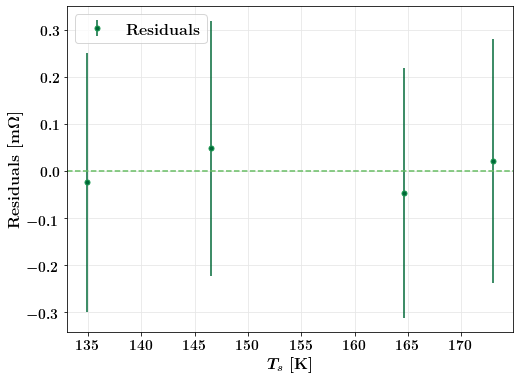

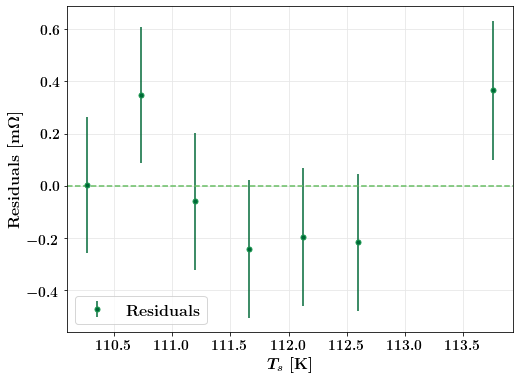

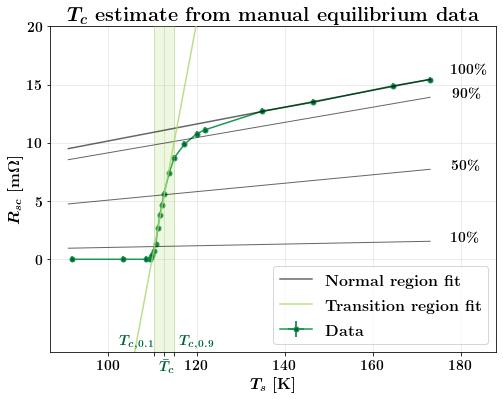

 FCN=0.0766883 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=2.52336e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.91047e+00   1.40876e+00   6.82094e-05  -3.63289e-03
   2  p1           7.24962e-02   9.02517e-03   4.37024e-07  -5.07365e-01
 FCN=1.58531 FROM MIGRAD    STATUS=CONVERGED     112 CALLS         113 TOTAL
                     EDM=1.39129e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -2.20896e+02   1.92598e+01   1.49175e-04  -8.77700e-04
   2  p1           2.01007e+00   1.72351e-01   1.33493e-06  -9.80566e-02


In [9]:
def t_estimate(df):

    def linear_fit(x,y,errx,erry,par_guess=[0,0],x1=0,x2=0):

        f = ROOT.TF1("f", "pol1") # Define linear fit model

        g = ROOT.TGraphErrors(x.size, x.astype(np.double), y.astype(np.double), 
                                  errx.astype(np.double), erry.astype(np.double))

        f.SetParameters(par_guess[0],par_guess[1]) # Set initial parameters
        fit = g.Fit('f','S',"")                    # Perform fit

        cov_ab = fit.GetCovarianceMatrix()[1,0] # Compute covariance term ab
        pcoeff = stats.pearsonr(x, y)           # Compute Pearson coefficient


        print('-------------------------------------------','\n')
        print('a: ', f.GetParameter(0),'+-',f.GetParError(0))
        print('b: ', f.GetParameter(1),'+-',f.GetParError(1),'\n')
        print('Chi2: ', f.GetChisquare())
        print('Ndf : ', f.GetNDF()      )
        print('Cov_ab: ',cov_ab)
        print('Pearson coefficient: ', pcoeff,'\n')

        print('-------------------------------------------')

        x_fit     = np.linspace(x[0]+x1, x[-1]+x2, 300)
        y_fit     = f.GetParameter(0) + f.GetParameter(1)*x_fit
        y_fit_res = f.GetParameter(0) + f.GetParameter(1)*x

        intercept = [f.GetParameter(0),f.GetParError(0)]
        slope     = [f.GetParameter(1),f.GetParError(1)]

        res = (y_fit_res - y)
        err_res = erry

        return(x_fit,y_fit,intercept,slope,res,err_res,cov_ab)  

    
    # Fit normal region and find its 50, 90 and 10 %
    min1 = 130
    max1 = 180
    minimum = min1
    maximum = max1
    
    data = df[df['Ts']>=minimum]
    data = data[data['Ts']<=maximum]

    x = np.array(data['Ts'])
    y = np.array(data['Rsc'])
    errx = np.array(data['err_Ts'])
    erry = np.array(data['err_Rsc'])

    print('Normal region fit:')
    x_up_fit, y_up_fit, int_up, slo_up, res_up, err_res_up, cov_ab = linear_fit(x,y,errx,erry,[100,1],-44,0)

    x_up = np.array(data['Ts'])
    
    def perc_fit(y,intercept,slope,perc=0.5):
        
        y_perc = perc * y
        intercept_perc = [perc * intercept[0], perc * intercept[1] ]
        slope_perc = [perc * slope[0], perc * slope[1] ]
    
        return(y_perc, intercept_perc, slope_perc)

    y_50, int_50, slo_50 = perc_fit(y_up_fit,int_up,slo_up,0.5)
    y_90, int_90, slo_90 = perc_fit(y_up_fit,int_up,slo_up,0.9)
    y_10, int_10, slo_10 = perc_fit(y_up_fit,int_up,slo_up,0.1)

    
    
    # Fit transition region
    min1 = 110.2
    max1 = 114.3
    minimum = min1
    maximum = max1
    
    data = df[df['Ts']>=minimum]
    data = data[data['Ts']<=maximum]

    x = np.array(data['Ts'])
    y = np.array(data['Rsc'])
    errx = np.array(data['err_Ts'])
    erry = np.array(data['err_Rsc'])

    print('Transition region fit:')
    x_s_fit, y_s_fit, int_s, slo_s, res_s, err_res_s, cov_cd = linear_fit(x,y,errx,erry,[-5,5],-10,10)

    x_s = np.array(data['Ts'])
    
    
    
    # Find interception points
    xp, yp = interception([int_50,slo_50],[int_s,slo_s],'50%','s',cov_ab,cov_cd)
    xp_90, yp_90 = interception([int_90,slo_90],[int_s,slo_s],'90%','s',cov_ab,cov_cd)
    xp_10, yp_10 = interception([int_10,slo_10],[int_s,slo_s],'10%','s',cov_ab,cov_cd)
    
    
    # Compute DeltaTc
    DeltaTc = xp_90[0]-xp_10[0]
    err_DeltaTc = np.sqrt(xp_90[1]**2 + xp_90[1]**2)
    print('------------------------------------')
    print('DeltaTc=', DeltaTc,'+-', err_DeltaTc)
    print('------------------------------------')
    
    
    # Find also intercept with zero
    xpp, ypp = interception([[0,0],[0,0]],[int_s,slo_s],'zero','s',0,cov_cd)
    
    
    
    # PLOT RESULTS
    
    
    # Plot normal region fit residuals
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    ax.errorbar(x_up,res_up,yerr=err_res_up,fmt='o',markerfacecolor=col[0],
                    color=col[1],ecolor=col[0],label=r'\bf{Residuals}',alpha=1,markersize=5)
    ax.axhline(0,color=col[2],ls='--')
    ax.set_xlabel(r'\bf{$T_{s}$ [K]}',fontsize=16)
    ax.set_ylabel(r'\bf{Residuals [m$\Omega$]}',fontsize=16)
    ax.grid(color='0.9')
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    plt.legend(loc='upper left',fontsize=16)
    #ax.set_xticks(np.arange(107, 115, 1))
    ax.set_axisbelow(True)
    plt.savefig(dir_name+'/equilibrium_normal_res.pdf', format='pdf',bbox_inches = "tight")
  

    # Plot transition region fit residuals
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    ax.errorbar(x_s,res_s,yerr=err_res_s,fmt='o',markerfacecolor=col[0],
                    color=col[1],ecolor=col[0],label=r'\bf{Residuals}',alpha=1,markersize=5)
    ax.axhline(0,color=col[2],ls='--')
    ax.set_xlabel(r'\bf{$T_{s}$ [K]}',fontsize=16)
    ax.set_ylabel(r'\bf{Residuals [m$\Omega$]}',fontsize=16)
    ax.grid(color='0.9')
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    plt.legend(loc='lower left',fontsize=16)
    #ax.set_xticks(np.arange(107, 115, 1))
    ax.set_axisbelow(True)
    plt.savefig(dir_name+'/equilibrium_transition_res.pdf', format='pdf',bbox_inches = "tight")
    
    
    # BIG PLOT
    fig, ax = plt.subplots(1, 1, figsize=(8,6))

    ax.errorbar(df['Ts'],df['Rsc'],yerr=df['err_Rsc'],xerr=df['err_Ts'],fmt='-o',markerfacecolor=col[0],
            color=col[1],ecolor=col[0],label=r'\bf{Data}',alpha=1,markersize=5)

    # Normal region fit
    ax.plot(x_up_fit,y_up_fit,color='black',linewidth=1.5,alpha=0.6,zorder=3,label=r'\bf{Normal region fit}')
    plt.text(x_up_fit[-1]+4.8,y_up_fit[-1]+0.5,'$100\%$',color='black',fontsize=14)

    ax.plot(x_up_fit,y_90,color='black',linewidth=1,alpha=0.6,zorder=3)
    plt.text(x_up_fit[-1]+5,y_90[-1],'$90\%$',color='black',fontsize=14)
    
    ax.plot(x_up_fit,y_50,color='black',linewidth=1,alpha=0.6,zorder=3)
    plt.text(x_up_fit[-1]+4.8,y_50[-1],'$50\%$',color='black',fontsize=14)
    
    ax.plot(x_up_fit,y_10,color='black',linewidth=1,alpha=0.6,zorder=3)
    plt.text(x_up_fit[-1]+4.7,y_10[-1],'$10\%$',color='black',fontsize=14)
    
    # Transition region fit
    ax.plot(x_s_fit,y_s_fit,color=col[3],linewidth=1.5,alpha=0.8,zorder=3,label=r'\bf{Transition region fit}')

    ax.axvline(xp[0],color=col[3],ls='--',linewidth=0.5,alpha=0.5,zorder=3)
    ax.axvline(xp_90[0],color=col[3],ls='--',linewidth=0.5,alpha=0.5,zorder=3)
    ax.axvline(xp_10[0],color=col[3],ls='--',linewidth=0.5,alpha=0.5,zorder=3)
    ax.axvspan(xp_10[0],xp_90[0], ymin=0, ymax=df['delta_V'].max(), alpha=0.2, color=col[3],zorder=3)
    
    #ax.annotate(s='', xy=(xp_10[0],46), xytext=(xp_90[0],46), arrowprops=dict(arrowstyle='<->'),zorder=4) 
    #plt.text(xp_10[0]-0.4,18,r'$\Delta T_c$',color='black',fontsize=10,zorder=4)

    plt.text(xp_10[0]-8,-7.3,r'$T_{c,0.1}$',color=col[0],fontsize=14)
    plt.text(xp[0]-1.2,-9.5,r'$\bar{T}_{c}$',color=col[0],fontsize=14)
    plt.text(xp_90[0]+1,-7.3,r'$T_{c,0.9}$',color=col[0],fontsize=14)
        
    #ax.scatter(xp[0],yp[0],color=col[5],ec=col[6],marker='o',s=10,zorder=6)
    #ax.scatter(xp_90[0],yp_90[0],color=col[8],ec=col[9],marker='o',s=10,zorder=6)
    #ax.scatter(xp_10[0],yp_10[0],color=col[8],ec=col[9],marker='o',s=10,zorder=6)
    
    ax.set_xlabel(r'\bf{$T_{s}$ [K]}',fontsize=16)
    ax.set_ylabel(r'\bf{$ V_{out}$ [mV]}',fontsize=16)
    ax.set_ylabel(r'\bf{$R_{sc}$ [m$\Omega$]}',fontsize=16)
    ax.grid(color='0.9')
    ax.set_axisbelow(True)
    ax.set_xlim(df['Ts'].min()-5,df['Ts'].max()+15)
    ax.set_ylim(-8,20)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_yticks(np.arange(0, 25, 5))
    
    ax.set_xticks([100,xp_10[0],xp[0],xp_90[0],120,140,160,180])
    labels = [item.get_text() for item in ax.get_xticklabels()]
    string_labels = [r'\bf{100}','','','',r'\bf{120}',r'\bf{140}',r'\bf{160}',r'\bf{180}']
    ax.set_xticklabels(string_labels)
    ax.set_title(r'\bf{$T_c$ estimate from manual equilibrium data}', fontsize=20)
        
    plt.legend(loc='lower right',fontsize=16)
    #plt.text(xp[0]+10,yp[0]-10,'$T_c$={: 2.1f} K'.format(xp[0]),color=col[0],fontsize=18)

    plt.savefig(dir_name+'/equilibrium_tc.pdf', format='pdf',bbox_inches = "tight")
    
    
t_estimate(df)